https://www.cs.toronto.edu/~frossard/post/linear_regression/

$$ \boldsymbol{y} = w.\boldsymbol{x}+b $$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc, pylab, animation

%matplotlib nbagg
#print(plt.style.available)
plt.style.use('dark_background')

In [2]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
#data_y = 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
data_x /= np.max(data_x)

In [3]:
data_x = np.hstack((np.ones_like(data_x), data_x, data_x**2, np.sin(data_x)))

In [4]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x
test_y = data_y
train_x = data_x
train_y = data_y

$$\begin{gather} \mathcal{L}(y,\hat{y}) = \dfrac{1}{M} \sum_{i=1}^{M} (\hat{y}_i-y_i)^2\\ \end{gather}$$
$$\begin{gather} \mathcal{L}(y,x,w) = \dfrac{1}{M} \sum_{i=1}^{M} \big(\hat{y}_i- (w^Tx_i+b)\big)^2
\end{gather}$$

$$ \begin{gather} \dfrac{\partial\mathcal{L}(y,x,w)}{\partial w} = -\dfrac{1}{M} \sum_{i=1}^{M} 2x_i\big(\hat{y}_i - (w^Tx_i+b)\big)
\end{gather} $$

$$ \begin{gather} \dfrac{\partial\mathcal{L}(y,x,w)}{\partial b} = -\dfrac{1}{M} \sum_{i=1}^{M} 2\big(\hat{y}_i - (w^Tx_i+b)\big)\\ \end{gather} $$

$$ \begin{gather} w = w - \alpha \dfrac{\partial\mathcal{L}(y,x,w)}{\partial w} \end{gather} $$
$$ \begin{gather} b = b - \alpha \dfrac{\partial\mathcal{L}(y,x,w)}{\partial b} \end{gather} $$

In [5]:
def get_gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    gradient = -(1.0/len(x)) * 2*error.dot(x)
    return gradient, np.power(error, 2)

In [6]:
#w = np.random.randn(2)
w = np.array([0,0,0,0])
alpha = .5

# Perform Gradient Descent
iterations = 800
errorplot = np.zeros(iterations)
xmin = min(data_x[:,1])
xmax = max(data_x[:,1])
nplot = 10
xplot=np.linspace(xmin,xmax,nplot)
yplot = np.zeros((iterations,nplot))
equation_plot = np.zeros((iterations,w.size))
for iteration in range(iterations):
    equation_plot[iteration] = w
    gradient, error = get_gradient(w, train_x, train_y)
    errorplot[iteration] = sum(error)
    yplot[iteration] = np.c_[np.ones(nplot),xplot,xplot**2, np.sin(xplot)].dot(w)
    new_w = w - alpha * gradient
    w = new_w


<IPython.core.display.Javascript object>


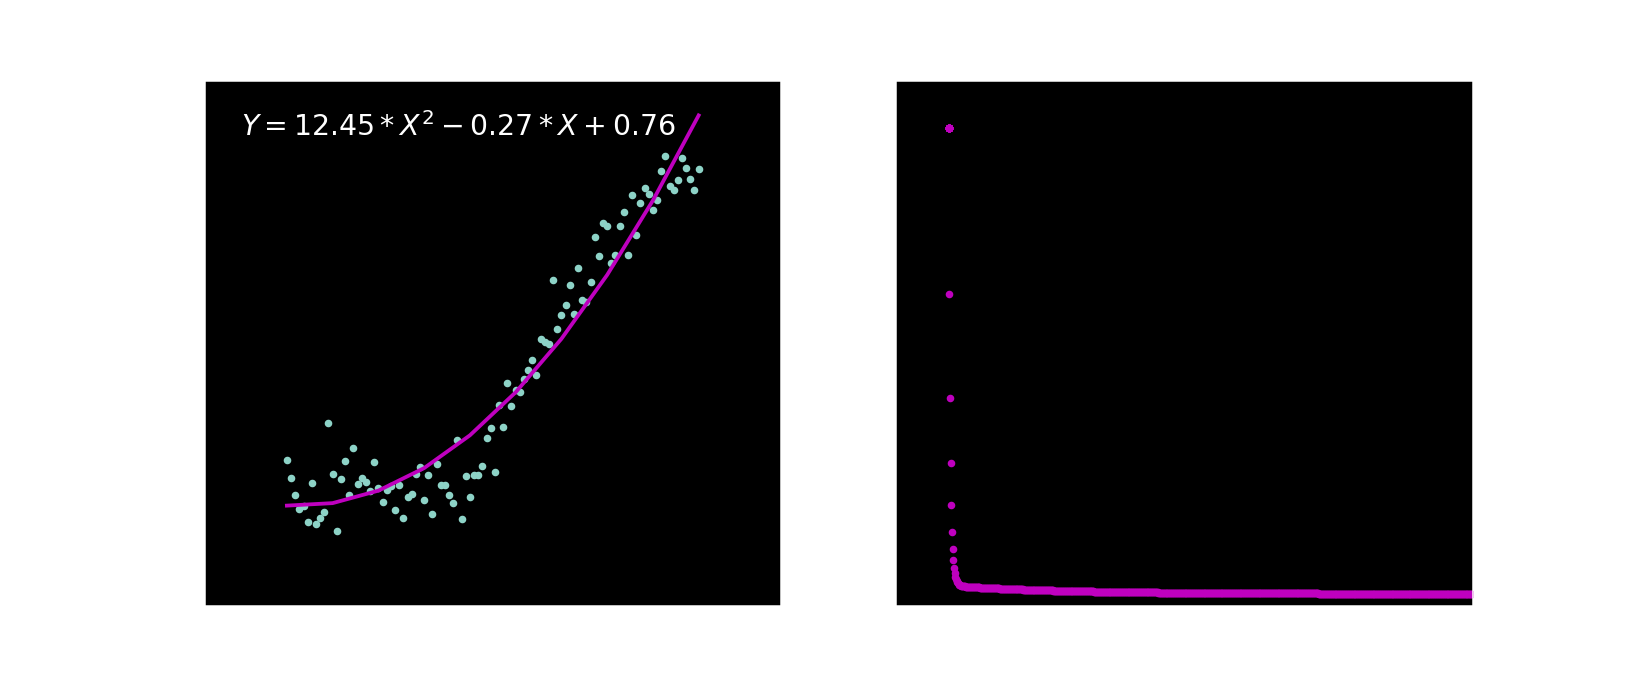

In [7]:
# Sent for figure
font = {'size'   : 9}
rc('font', **font)

# Setup figure and subplots
f0 = pylab.figure(num = 0, figsize = (12, 5))#, dpi = 100)
f0.suptitle("Linear Regression", fontsize=12)
ax01 = pylab.subplot2grid((1, 2), (0, 0))
ax02 = pylab.subplot2grid((1, 2), (0, 1))

# Set titles of subplots
ax01.set_title('Learning')
ax02.set_title('Gradient Descent')

ymax = max(data_y[:,0])
ymin = min(data_y[:,0])
padx = (xmax-xmin)/5
pady = (ymax-ymin)/5
# set x and y limits
ax01.set(xlim=(xmin - padx, xmax + padx), ylim=(ymin - pady, ymax + pady))
ax02.set(xlim=(-iterations/10, iterations), ylim=(0, max(errorplot)+(max(errorplot)-min(errorplot))/10))

# Turn on grids
ax01.grid(False)
ax02.grid(False)

# set label names
ax01.set_xlabel("X")
ax01.set_ylabel("Y")
ax02.set_xlabel("Iterations")
ax02.set_ylabel("Error")


ax01.scatter(data_x[:,1], data_y[:,0], marker='.')
line = ax01.plot(xplot, yplot[0], color='m', lw=2)[0]
error_annotation = ax02.annotate('',
            xy=(iterations/2, np.ptp(errorplot)/2), xycoords='data',
            xytext=(20, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
equation_text = ax01.text(0, 10, '$Y = %.2f * X^2 + %.2f * X + %.2f$'%(equation_plot[0][2], equation_plot[0][1], equation_plot[0][0]), fontsize=15)

def update_time():
    t = 0
    t_max = iterations
    while t<t_max:
        t += anim.direction
        yield t


# Create the init function that returns the objects
# that will change during the animation process
def init():
    return line, error_annotation, equation_text

def animate(i):
    # The following line is to speedup the animation update
    anim.event_source.interval = iterations/(i+1)
    
    ax01.set_title('Learning: Iteration no. %d'%i)
    line.set_ydata(yplot[i])
    
    x_square = '{:.2f}'.format(equation_plot[i][2])
    x_ = '{:+.2f}'.format(equation_plot[i][1])
    x_[:1] + ' ' + x_[1:]
    b_ = '{:+.2f}'.format(equation_plot[i][0])
    b_[:1] + ' ' + b_[1:]
    
    equation_text.set_text('$Y = {0} * X^2 {1} * X {2}$'.format(x_square, x_, b_))
    ax02.plot([i], [errorplot[i]], 'm', marker='.')
    error_annotation.set_text('Error:\n%.4f'%errorplot[i])
    error_annotation.xy = (i,errorplot[i])
    return line, error_annotation, equation_text

def on_press(event):
    if event.key.isspace():
        if anim.running:
            anim.event_source.stop()
        else:
            anim.direction = 1
            anim.event_source.start()
        anim.running ^= True
    elif event.key == 'left':
        anim.direction = -1
    elif event.key == 'right':
        anim.direction = 1

    # Manually update the plot
    if event.key in ['left','right']:
        t = anim.frame_seq.next()
        animate(t)
        plt.draw()

f0.canvas.mpl_connect('key_press_event', on_press)
anim = animation.FuncAnimation(f0, animate, init_func=init, interval=1, frames=update_time(), repeat=False, blit=True)
anim.running = False
anim.direction = 0
plt.show()